In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### For this problem we will use the dataset uploaded on kaggle. $\rightarrow$ [Link to the Dataset](https://www.kaggle.com/datasets/saurabh00007/diabetescsv](https://link-url-here.org)

In [2]:
# reading the value from the csv file.
df = pd.read_csv('/kaggle/input/diabetescsv/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


`DataFrame.describe()` method is used to get some insight of the data in one place. Such as $\rightarrow$
> <font color="orange">**count:**</font> Total number of non-null data in the column\
> <font color="orange">**mean:**</font> Mean of the values of that very column [Central Point in the Distribution Curve]\
> <font color="orange">**std:**</font> Standard Deviation of that very column. [Spread of the data]\
> <font color="orange">**min and max:**</font> Minimum and maximum values of that very column.

**NOTE:** It only consider the numerical data and not categorical data.

In [3]:
# Getting some insights of the data:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Calculate the variance of the values in different columns:
df.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

We can see a huge difference in the variance between Insulin and BMI and same like between other features also.
To get a visual insight we can plot between Insulin level and BMI.

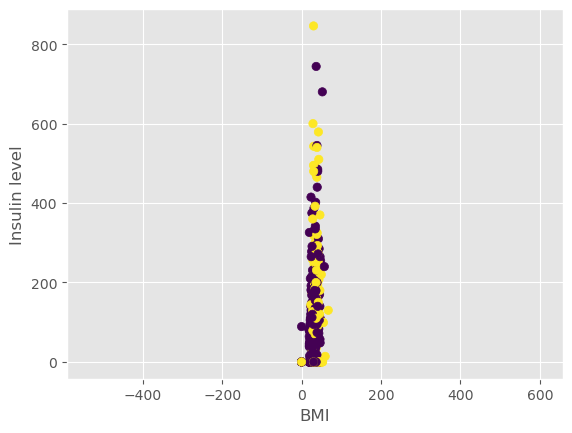

In [5]:
plt.style.use('ggplot')
plt.scatter(df['BMI'].values, df['Insulin'].values,c = df['Outcome'].values)
plt.xlabel('BMI')
plt.axis('equal')
plt.ylabel('Insulin level')
plt.show()

In [6]:
# Split the data into target and features:
X = df.drop('Outcome', axis = 1)
y = df.Outcome

In [7]:
# Make a copy of the original feature it'll come in handy in time of scaling.
X_scaled = X.copy()

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Filling the missing values.

# X_scaled['Pregnancies'].fillna(X_scaled['Pregnancies'].mean(), inplace = True)
# X_scaled['Glucose'].fillna(X_scaled['Glucose'].mode(), inplace = True)
# X_scaled['BloodPressure'].fillna(X_scaled['BloodPressure'].mode(), inplace = True)
# X_scaled['SkinThickness'].fillna(X_scaled['SkinThickness'].mode(), inplace = True)
# X_scaled['Insulin'].fillna(X_scaled['Insulin'].mean(), inplace = True)
# X_scaled['BMI'].fillna(X_scaled['BMI'].mode(), inplace = True)
# X_scaled['DiabetesPedigreeFunction'].fillna(X_scaled['DiabetesPedigreeFunction'].mode(), inplace = True)
# X_scaled['Age'].fillna(X_scaled['Age'].mean(), inplace = True)

We can see the range of the data are very uneven, we have to scale the data, as it improves the performance of the model.
## Scaling:
There are many methods available to scale the data. Some of the widely used methods are $\rightarrow$
> <font color="orange">**Standard Scaler:**</font> It makes the spread of the data 1, and mean 0, Its is not suitable if the distribution of the data is not gaussian or normal.\
> <font color="orange">**Min Max Scaler:**</font> It shrinks the spread of the data between 0 and 1(incase of only positive values) or b/w -1 to 1 (incase of integer values)\
> <font color="orange">**Robust Scaler:**</font> Its use case is same as `MinMaxScaler()` but it is not sensitive to outliers as the former one is.

**For more Reading and Concept: Take a look at the colab notebook $\rightarrow$ [Data Scaling Methods](https://colab.research.google.com/drive/1X4D59n_iwyZG51qYTDLjWa0xRl2l9HIJ?usp=sharing)**

Fortunately, here is no missing values. if there were some missing values then we have to impute the feature values with *Mean* or *Mode* in this case. [In that case we have to execute the code block below]

<Axes: ylabel='Density'>

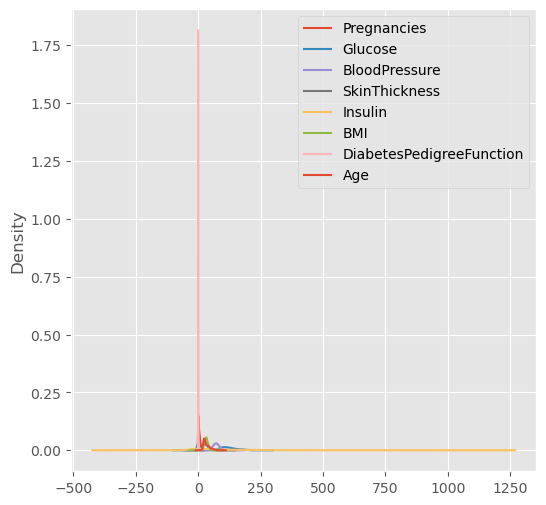

In [10]:
# Take a look at the distribution of the data.
X.plot(kind = 'kde', subplots = False, figsize = (6, 6))

In [11]:
# Initiate standard scaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X_scaled)
# As fit_transform gives numpy array, to plot easily with pandas I've made the data into a dataframe.
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

<Axes: ylabel='Density'>

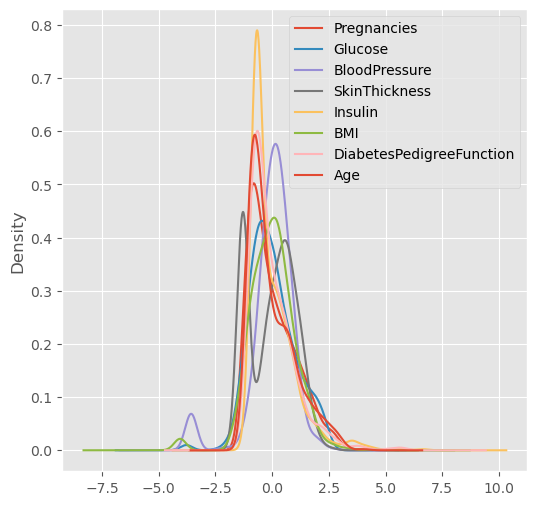

In [12]:
# Plot after scaling the data.
X_scaled.plot(kind = 'kde', subplots = False, figsize = (6, 6))

In [13]:
# Splitting the data into training and testing data:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 1, stratify = y)

In [14]:
# Instantiating a KNN Classifier model. [I like to use knc rather than knn for Classifier]
knc = KNeighborsClassifier()

> To estimate the right number of `n_neighbors` we'll use a technique called GridSearchCV:
more on GridSearchCV $\rightarrow$ **[Here](https://www.mygreatlearning.com/blog/gridsearchcv/)**

In [15]:
param_grid = {'n_neighbors': range(1, 50)}
grid = GridSearchCV(knc, param_grid, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

In [16]:
# Printing the best score and best hyperparameter (here, n_neighbors)
print('Best Parameter: %s' % grid.best_params_)
print('Best Score: %s' % grid.best_score_)

Best Parameter: {'n_neighbors': 43}
Best Score: 0.7690704647676162


In [17]:
grid_prediction = grid.predict(X_test)
grid_prediction

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

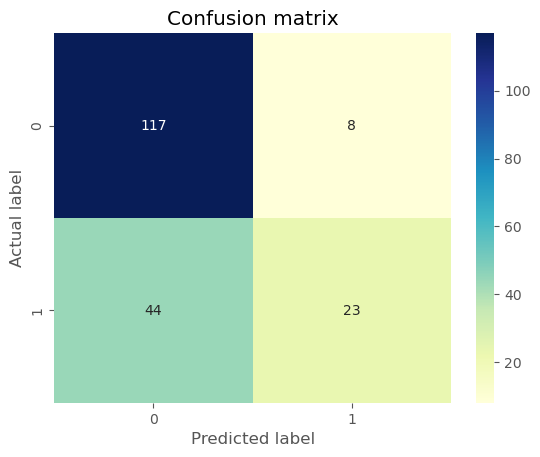

In [18]:
# We can construct a confusion matrix to visualize the correctly and incorrectly label scores:
conf_matrix = confusion_matrix(y_test, grid_prediction)
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap ='YlGnBu', fmt = 'g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [19]:
# We can get a detailed Classification Score of the model:
clf_report = classification_report(y_test, grid_prediction)
print(clf_report)

              precision    recall  f1-score   support

           0       0.73      0.94      0.82       125
           1       0.74      0.34      0.47        67

    accuracy                           0.73       192
   macro avg       0.73      0.64      0.64       192
weighted avg       0.73      0.73      0.70       192



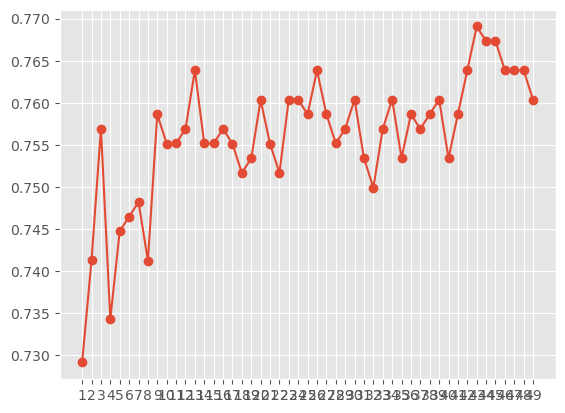

In [20]:
all_scores = grid.cv_results_['mean_test_score']
plt.plot(range(1,50), all_scores, 'o-')
plt.xticks(range(1,50))
plt.rcParams['figure.figsize'] = [25,4]
plt.show()

Seems like <font color="red">43</font> is the best hyperparameter(`n_neighbors`) for this case. As we have found from the `GridSearchCV()` method